In [ ]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content/kaggle.json'

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
  !ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 64 Aug 10 00:05 kaggle.json
{"username":"diptaroy","key":"c4c1899a45f60acb8e710d7a4e0afb05"}

In [ ]:
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 2.3MB/s 
     |████████████████████████████████| 5.3MB 4.8MB/s 
     |████████████████████████████████| 133kB 41.0MB/s 
     |████████████████████████████████| 112kB 37.6MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "diptaroy" # username from the json file
os.environ['KAGGLE_KEY'] = "c4c1899a45f60acb8e710d7a4e0afb05" # key from the json file

In [ ]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

100% 3.09G/3.10G [01:17<00:00, 54.7MB/s]
100% 3.10G/3.10G [01:17<00:00, 43.1MB/s]


In [ ]:
!unzip -q breast-histopathology-images.zip 

In [ ]:
images_folder = '/content/IDC_regular_ps50_idx5'

In [ ]:
import os
for dirname, _, filenames in os.walk(images_folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/IDC_regular_ps50_idx5/14157/1/14157_idx5_x2051_y851_class1.png
/content/IDC_regular_ps50_idx5/14157/1/14157_idx5_x2101_y1701_class1.png
/content/IDC_regular_ps50_idx5/14157/1/14157_idx5_x1401_y1201_class1.png
/content/IDC_regular_ps50_idx5/14157/1/14157_idx5_x2351_y1201_class1.png
/content/IDC_regular_ps50_idx5/14157/1/14157_idx5_x2401_y851_class1.png
/content/IDC_regular_ps50_idx5/14157/1/14157_idx5_x2101_y951_class1.png
/content/IDC_regular_ps50_idx5/14157/1/14157_idx5_x1451_y801_class1.png
/content/IDC_regular_ps50_idx5/14157/1/14157_idx5_x2351_y701_class1.png
/content/IDC_regular_ps50_idx5/14157/1/14157_idx5_x2101_y751_class1.png
/content/IDC_regular_ps50_idx5/14157/1/14157_idx5_x1851_y1601_class1.png
/content/IDC_regular_ps50_idx5/14157/1/14157_idx5_x1551_y1151_class1.png
/content/IDC_regular_ps50_idx5/14157/1/14157_idx5_x1751_y1301_class1.png
/content/IDC_regular_ps50_idx5/14157/1/14157_idx5_x2151_y1351_class1.png
/conte

In [ ]:
import pandas as pd
import numpy as np
import os
from glob import glob
import itertools
import fnmatch
import random
import matplotlib.pylab as plt
import seaborn as sns
import cv2
# from scipy.misc import imresize, imread
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import keras
from keras import backend as K
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, model_from_json
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#let's take a look at if we're in the right folder
imagePatches = glob('/content/IDC_regular_ps50_idx5/**/*.png', recursive=True)
for filename in imagePatches[0:15]:
    print(filename)

/content/IDC_regular_ps50_idx5/12750/0/12750_idx5_x2301_y401_class0.png
/content/IDC_regular_ps50_idx5/12750/0/12750_idx5_x1851_y1751_class0.png
/content/IDC_regular_ps50_idx5/12750/0/12750_idx5_x1301_y851_class0.png
/content/IDC_regular_ps50_idx5/12750/0/12750_idx5_x601_y151_class0.png
/content/IDC_regular_ps50_idx5/12750/0/12750_idx5_x2651_y1051_class0.png
/content/IDC_regular_ps50_idx5/12750/0/12750_idx5_x401_y1551_class0.png
/content/IDC_regular_ps50_idx5/12750/0/12750_idx5_x701_y451_class0.png
/content/IDC_regular_ps50_idx5/12750/0/12750_idx5_x201_y1351_class0.png
/content/IDC_regular_ps50_idx5/12750/0/12750_idx5_x751_y1701_class0.png
/content/IDC_regular_ps50_idx5/12750/0/12750_idx5_x751_y2001_class0.png
/content/IDC_regular_ps50_idx5/12750/0/12750_idx5_x301_y1401_class0.png
/content/IDC_regular_ps50_idx5/12750/0/12750_idx5_x3501_y301_class0.png
/content/IDC_regular_ps50_idx5/12750/0/12750_idx5_x751_y1901_class0.png
/content/IDC_regular_ps50_idx5/12750/0/12750_idx5_x1001_y451_cla

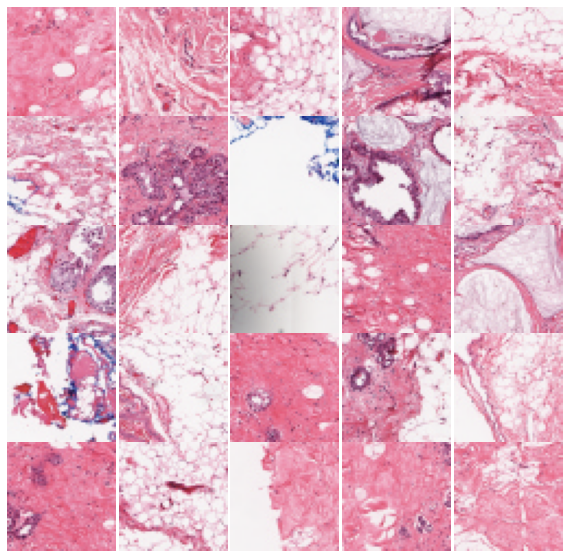

In [ ]:
#let's look at the first 25 images
bunchOfImages = imagePatches
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in bunchOfImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (50, 50)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

In [ ]:
classZero = '*class0.png'
classOne = '*class1.png'
classZero = fnmatch.filter(imagePatches, classZero)
classOne = fnmatch.filter(imagePatches, classOne)
print("IDC(-)\n\n",classZero[0:5],'\n')
print("IDC(+)\n\n",classOne[0:5])

IDC(-)

 ['/content/IDC_regular_ps50_idx5/12750/0/12750_idx5_x2301_y401_class0.png', '/content/IDC_regular_ps50_idx5/12750/0/12750_idx5_x1851_y1751_class0.png', '/content/IDC_regular_ps50_idx5/12750/0/12750_idx5_x1301_y851_class0.png', '/content/IDC_regular_ps50_idx5/12750/0/12750_idx5_x601_y151_class0.png', '/content/IDC_regular_ps50_idx5/12750/0/12750_idx5_x2651_y1051_class0.png'] 

IDC(+)

 ['/content/IDC_regular_ps50_idx5/12750/1/12750_idx5_x251_y351_class1.png', '/content/IDC_regular_ps50_idx5/12750/1/12750_idx5_x501_y251_class1.png', '/content/IDC_regular_ps50_idx5/12750/1/12750_idx5_x401_y251_class1.png', '/content/IDC_regular_ps50_idx5/12750/1/12750_idx5_x401_y301_class1.png', '/content/IDC_regular_ps50_idx5/12750/1/12750_idx5_x401_y401_class1.png']


In [ ]:
def proc_images(lowerIndex,upperIndex):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """ 
    x = []
    y = []
    patient = []
    WIDTH = 50
    HEIGHT = 50

    for img in imagePatches[lowerIndex:upperIndex]:
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
        patient.append(img)


        if img in classZero:
            y.append(0)
        elif img in classOne:
            y.append(1)
        else:
            return
    return x,y, patient

In [65]:
from os import listdir
base_path = "/content/IDC_regular_ps50_idx5/"
folder = listdir(base_path)


total_images = 0
for n in range(len(folder)):
    patient_id = folder[n]
    for c in [0, 1]:
        patient_path = base_path + patient_id 
        class_path = patient_path + "/" + str(c) + "/"
        subfiles = listdir(class_path)
        total_images += len(subfiles)
total_images

277524

In [66]:
X,Y, patient = proc_images(0,(total_images-1))
df = pd.DataFrame()
df["images"]=X
df["labels"]=Y
df['id'] = patient
X2=df["images"]
Y2=df["labels"]
X2=np.array(X2)
imgs0=[]
imgs1=[]
imgs0 = X2[Y2==0] # (0 = no IDC, 1 = IDC)
imgs1 = X2[Y2==1]  # these come in later when we want to visualize the differences between IDC(-) and IDC(+)

In [ ]:
#To add patient ID to the dataframe
df['patient_id']=df['id'].apply(lambda x: x.split('/')[3])
df.drop(labels='id', axis=1, inplace=True)

In [61]:
df.shape

(6000, 3)

In [63]:
df[df['labels']==1].head(2)

,images,labels,patient_id
1413,"[[[181, 162, 200], [205, 194, 212], [219, 204,...",1,12750
1414,"[[[206, 188, 213], [186, 157, 214], [155, 112,...",1,12750


In [64]:
df.groupby("patient_id").size()

patient_id
10305    1821
12750    1434
13402     811
14154     474
14209     342
8984     1118
dtype: int64

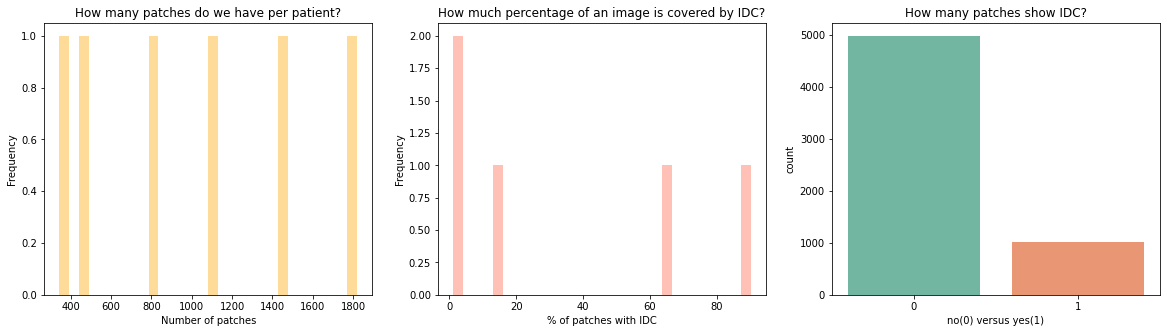

In [ ]:
cancer_perc = df.groupby("patient_id").labels.value_counts()/ df.groupby("patient_id").labels.size()
cancer_perc = cancer_perc.unstack()

fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(df.groupby("patient_id").size(), ax=ax[0], color="Orange", kde=False, bins=30)
ax[0].set_xlabel("Number of patches")
ax[0].set_ylabel("Frequency");
ax[0].set_title("How many patches do we have per patient?");
sns.distplot(cancer_perc.loc[:, 1]*100, ax=ax[1], color="Tomato", kde=False, bins=30)
ax[1].set_title("How much percentage of an image is covered by IDC?")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("% of patches with IDC");
sns.countplot(df.labels, palette="Set2", ax=ax[2]);
ax[2].set_xlabel("no(0) versus yes(1)")
ax[2].set_title("How many patches show IDC?");